In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Path 
Chemin au dossier de la simulation

In [68]:
path = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/Reference"

## Temps d'exécutions (ms)

In [69]:
temps = pd.read_csv(path + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init  Run  Iterations  Update_csv  Permutations  Update_AP  Update_H  \
0    26   18          18           9             0          0         8   

   Coords  Contamination_cases  Mouvement  Total  Unnamed: 11  
0       1                    1          1     45          NaN  


## Contaminations au fil du temps

<function matplotlib.pyplot.show(close=None, block=None)>

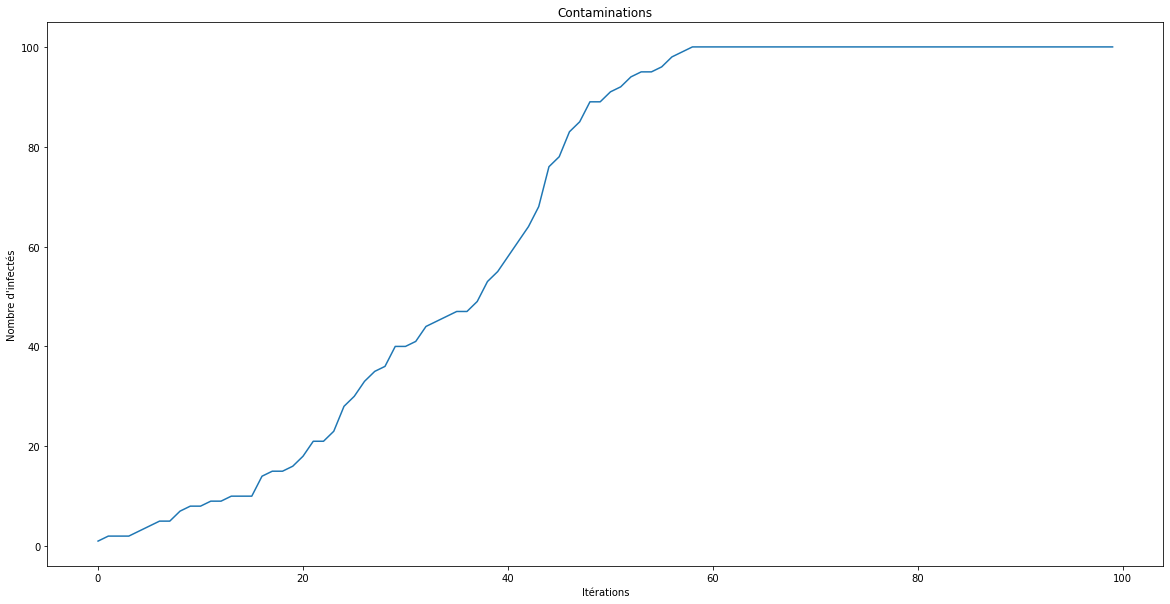

In [70]:
contamine = pd.read_csv(path + "/data_csv/Humain_contamine.csv", dtype=int)
sum_contamine = contamine.sum(axis=1)
plt.cla()
plt.title("Contaminations")
sum_contamine.plot(figsize=(20, 10))
plt.xlabel("Itérations")
plt.ylabel("Nombre d'infectés")
plt.show

## Nombre de fois que les individus ont été contaminés

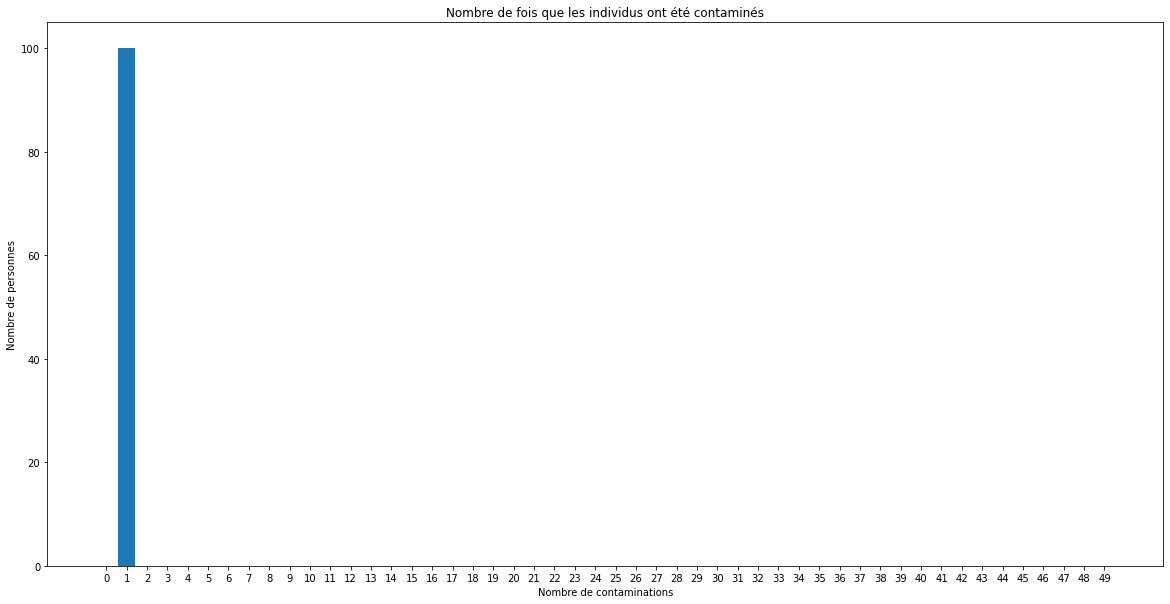

In [71]:
contamine = pd.read_csv(path + "/data_csv/Humain_contamine.csv", dtype=int)
contamine_data = pd.DataFrame(contamine)

# get le nombre max pour les label du bar plot

taille = 50

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Nombre de fois que les individus ont été contaminés")
ax.set_xlabel('Nombre de contaminations')
ax.set_ylabel('Nombre de personnes')




#nb_fois_contamine = ['0', '1', '2', '3', '4', '5']
#x = np.zeros((6,), dtype=int)
#for value in range(x.shape[0]):
#    x[value] = value 
#nb_fois_contamine = np.array2string(x)
#print(nb_fois_contamine)
nb_fois_contamine = []
for i in range(taille):
    nb_fois_contamine.append(str(i))

#somme_fois_contamine = [0,0,0,0,0,0]
somme_fois_contamine = np.zeros((taille,), dtype=int)
for individu in contamine_data:
    #print(contamine_data[individu])
    #print("start")
    count = 0
    state = contamine_data[individu].iloc[0]
    if(state == 1):
        count += 1
    #print(state)
    for case in contamine_data[individu]:
        if(case != state): # changement de status détecté
            state = case
            if(case == 1):
                count += 1
    #print(count)
    somme_fois_contamine[count] += 1

ax.bar(nb_fois_contamine,somme_fois_contamine)
plt.show()

## Nombre de pathogènes différents au fil du temps

<AxesSubplot:title={'center':'Nombre de pathogène différents par itération'}, xlabel='Iterations', ylabel='Nombre de pathogènes'>

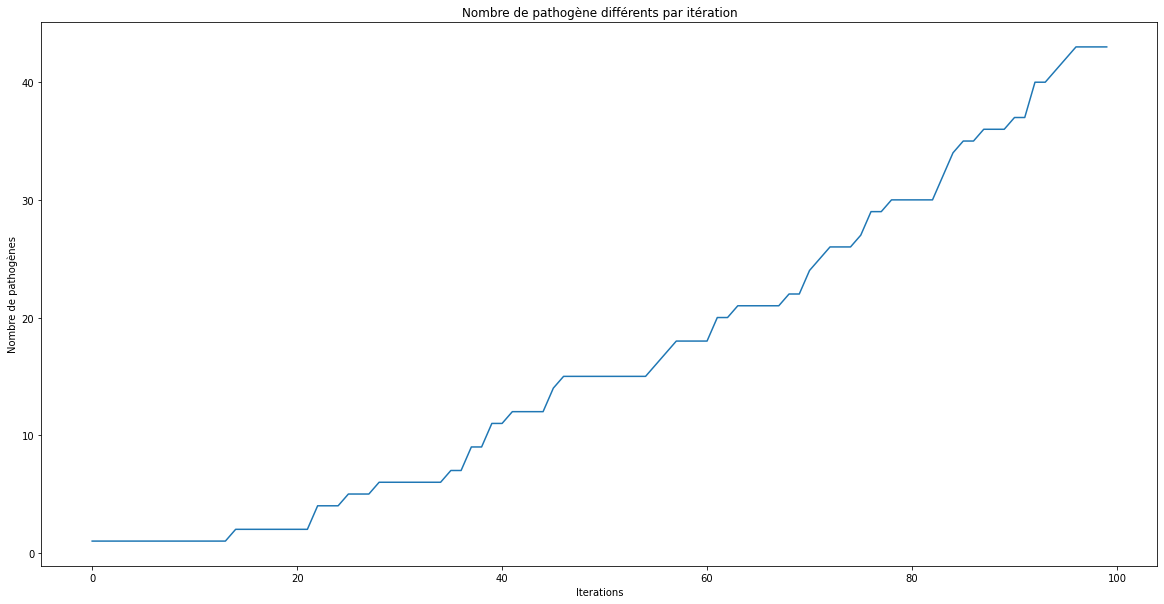

In [72]:
genome_AP = pd.read_csv(path + "/data_csv/Humain_genomeAP.csv")
genome_AP_data = pd.DataFrame(genome_AP)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Nombre de pathogène différents par itération")
ax.set_xlabel('Iterations')
ax.set_ylabel('Nombre de pathogènes')

nb_AP = genome_AP_data.nunique(axis=1)
nb_AP.plot()

## Nombre de personnes contaminées par chaque agent pathogène
Ne fonctionne que si une personnes n'est contaminée qu'une seule fois par un certain agent pathogène.

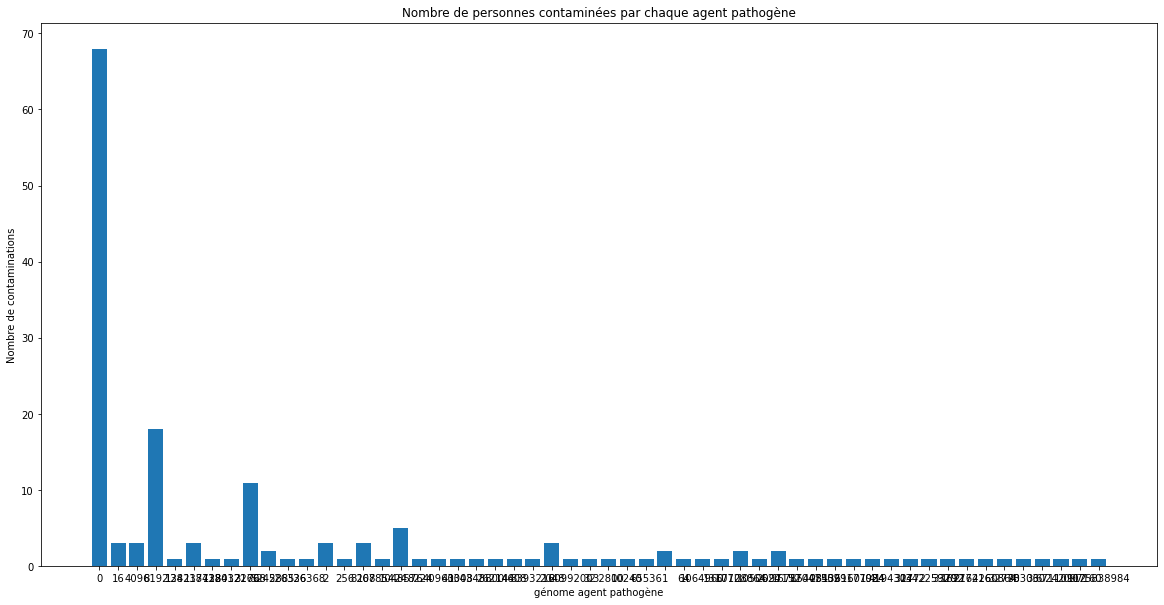

In [73]:
genome_AP = pd.read_csv(path + "/data_csv/Humain_genomeAP.csv")
genome_AP_data = pd.DataFrame(genome_AP)

liste = []
total_liste = []
final_count_liste = []
for individu in genome_AP_data:
    for element in genome_AP_data[individu].unique():
        if(str(element) != "nan"):
            total_liste.append(int(float(str(element))))
            if(int(float(str(element))) not in liste):
                liste.append(int(float(str(element))))

for ap in liste:
    final_count_liste.append(total_liste.count(ap))


fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Nombre de personnes contaminées par chaque agent pathogène")
ax.set_xlabel('génome agent pathogène')
ax.set_ylabel('Nombre de contaminations')


liste_final = []
for i in range(len(liste)):
    liste_final.append(str(liste[i]))

#print(final_count_liste)

ax.bar(liste_final,final_count_liste)
plt.show()

## Nombre d'immunités à chaque pathogène

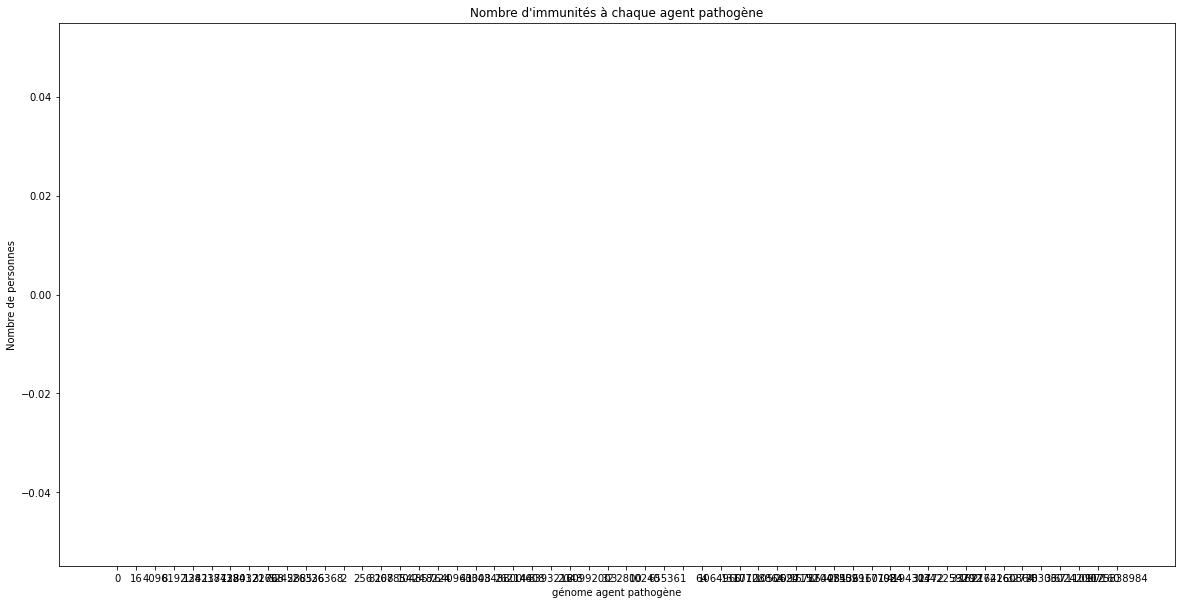

In [74]:
genome_AP = pd.read_csv(path + "/data_csv/Humain_immune.csv", dtype=str)
genome_AP_data = pd.DataFrame(genome_AP)
#print(len(genome_AP_data))
#print(genome_AP_data.loc[len(genome_AP_data)-1])
l = []
for cell in genome_AP_data.loc[len(genome_AP_data)-1]:
    if(str(cell) != "nan"):
        #print(" " in str(cell))
        if(" " in str(cell)):
            #l = l + cell.split(" ")
            tmp = cell.split(" ")
            tmp.pop(-1)
            #print(tmp)
            for element in tmp:
                l.append(int(float(element)))
        else:
            l.append(int(float(cell)))
final_count_liste = []

for element in l:
    element = int(float(element))

for element in liste:
    element = int(float(element))
    #print(element)

for ap in liste:
    final_count_liste.append(l.count(ap))
    #print(l.count(ap))

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Nombre d'immunités à chaque agent pathogène")
ax.set_xlabel('génome agent pathogène')
ax.set_ylabel('Nombre de personnes')

#print(liste)
#print(l)

#print(liste_final)
#print(final_count_liste)

ax.bar(liste_final,final_count_liste)
plt.show()

## Nombre d'immunités par individu

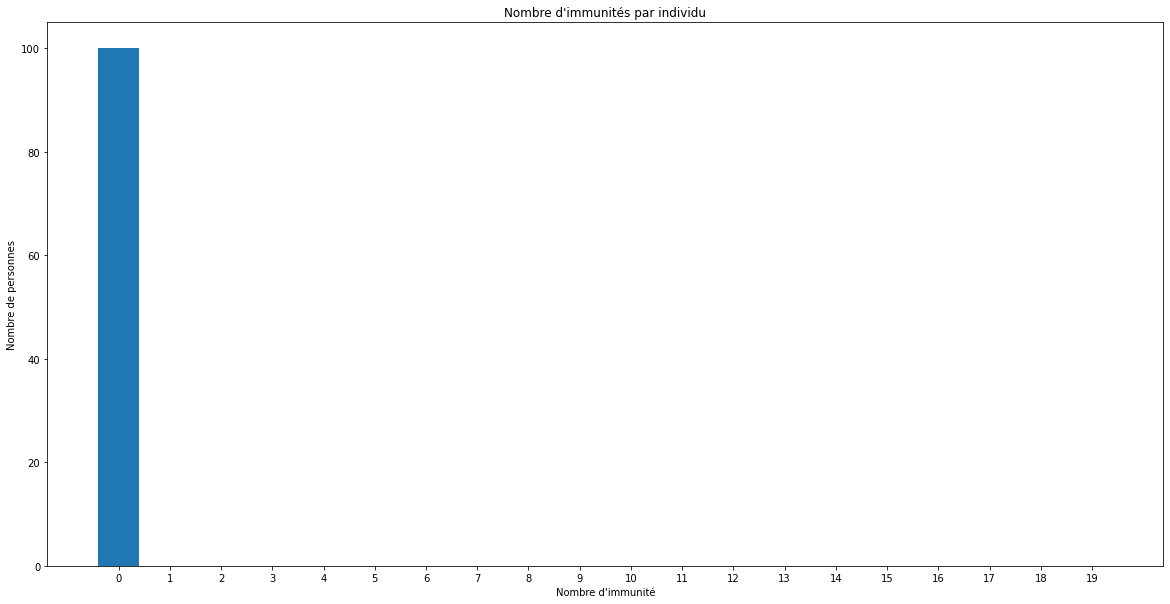

In [75]:
genome_AP = pd.read_csv(path + "/data_csv/Humain_immune.csv", dtype=str)
genome_AP_data = pd.DataFrame(genome_AP)
#print(genome_AP_data.loc[len(genome_AP_data)-1])

taille = 20

nb_immune = []
for i in range(taille):
    nb_immune.append(str(i))

count_immune = []
for i in genome_AP_data.loc[len(genome_AP_data)-1]:
    #print(i)
    if(str(i) == "nan"):
        count_immune.append(0)
    else:
        if(" " in str(i)):
            tmp = i.split(" ")
            tmp.pop()
            count_immune.append(len(tmp))
        else:
            count_immune.append(1)
#print(nb_immune)
#print(count_immune)

nb_immune_sum = np.zeros((taille,), dtype=int)
for i in range(len(nb_immune)):
    nb_immune_sum[i] = count_immune.count(int(nb_immune[i]))
#print(nb_immune_sum)


fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Nombre d'immunités par individu")
ax.set_xlabel('Nombre d\'immunité')
ax.set_ylabel('Nombre de personnes')


#print(nb_immune_sum)

ax.bar(nb_immune,nb_immune_sum)
plt.show()

## Nombre total d'immunités au fil du temps

<function matplotlib.pyplot.show(close=None, block=None)>

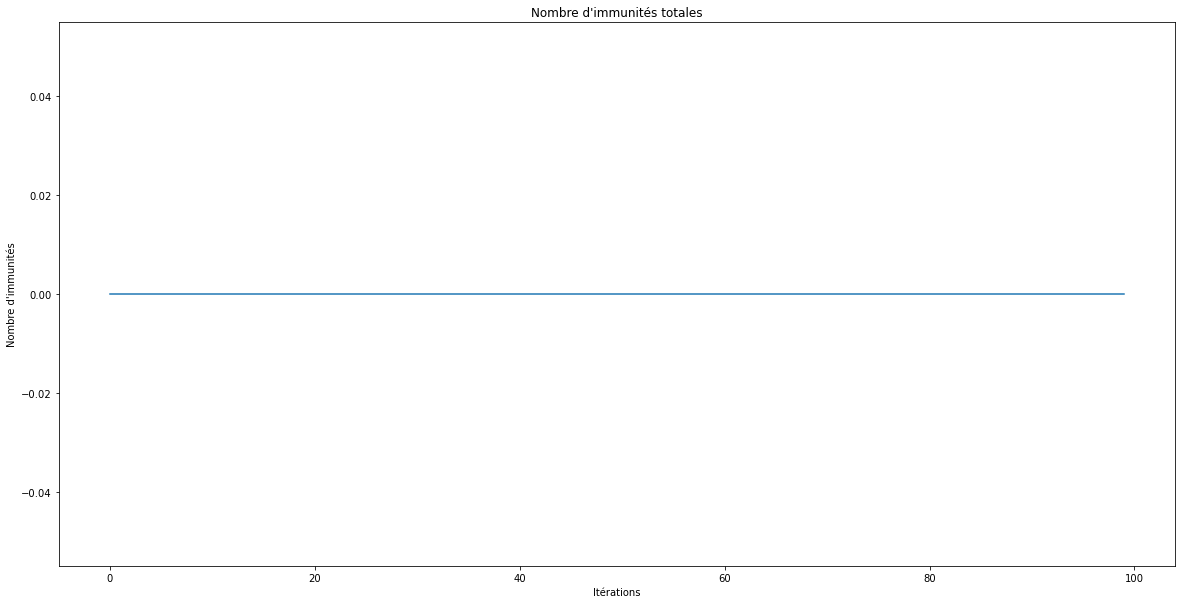

In [76]:
genome_AP = pd.read_csv(path + "/data_csv/Humain_immune.csv", dtype=str)
genome_AP_data = pd.DataFrame(genome_AP)
#count_AP = []
#genome_AP_data.count(1)
#genome_AP_data.Humain_4.str.get_dummies(sep=' ').sum()
#genome_AP_data.loc[360].str.get_dummies(sep=' ').sum().sum()

fig = plt.figure(figsize=(20, 10))
plt.title("Nombre d'immunités totales")
plt.plot([genome_AP_data.loc[i].str.get_dummies(sep=' ').sum().sum() for i in range(genome_AP_data.shape[0])])
plt.xlabel("Itérations")
plt.ylabel("Nombre d'immunités")
plt.show

#for l in range(genome_AP_data.shape[0]):
#for i in genome_AP_data.loc[360]:
#    print(i)

## Hamming distance entre génomes H et AP

<AxesSubplot:title={'center':'Diatance de hamming entre les génomes H et AP'}, xlabel='distance de hamming', ylabel='Frequency'>

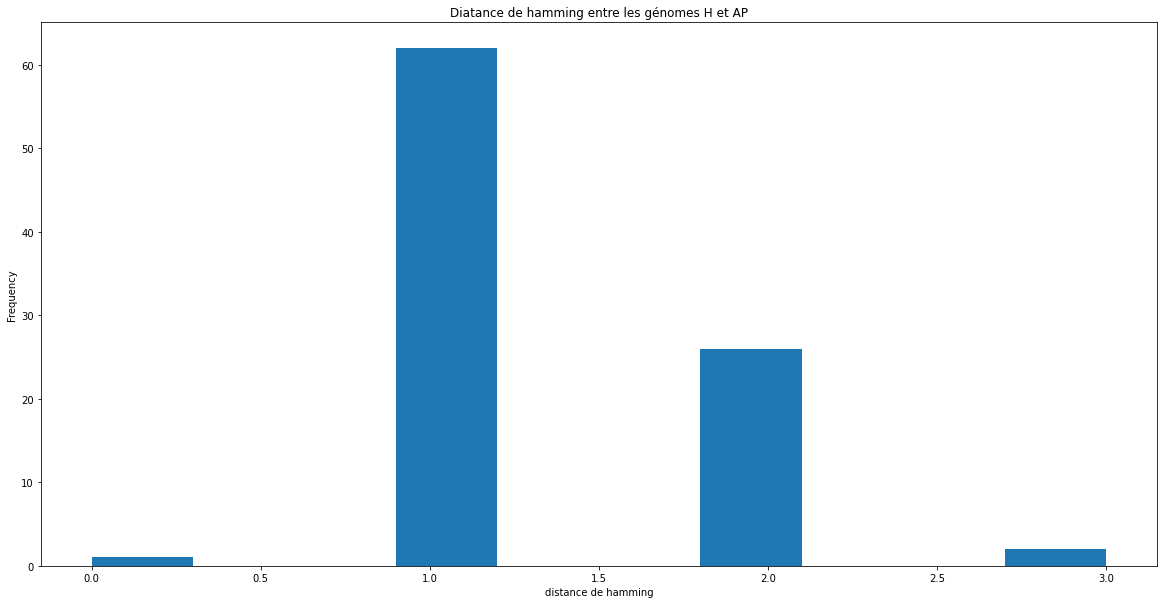

In [77]:
distance_hamming = pd.read_csv(path + "/data_csv/HammingDistance.csv")
distance_hamming_data = pd.DataFrame(distance_hamming)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Diatance de hamming entre les génomes H et AP")
ax.set_xlabel('distance de hamming')
ax.set_ylabel('Nombre de personnes')

iteration = 50
distance_hamming_data.loc[iteration].plot.hist()
